In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pickle
import pandas as pd
from conformity import attribute_conformity

In [23]:
# Importing data

DG = nx.read_gexf('../data_collection/data/network_connected.gexf')

G = nx.DiGraph.to_undirected(DG)
nx.is_connected(G)

True

In [24]:
#node_to_conformity = attribute_conformity(G, [0,1,3], labels=['category'])

In [25]:
'''
with open("conformity.pkl", 'wb') as f:
     pickle.dump(node_to_conformity,f)
'''

'\nwith open("conformity.pkl", \'wb\') as f:\n     pickle.dump(node_to_conformity,f)\n'

In [26]:
with open("conformity.pkl", 'rb') as f:
     node_to_conformity = pickle.load(f)

In [27]:
node_to_conformity['1']['category']

{'Field trip': 0.021949178122077626,
 'Education in emergencies and conflict areas': -0.24840500229566162,
 'Ability grouping': 0.2512672462217193,
 'Classwide Peer Tutoring': 0.254646684294927,
 'Flexible learning': 0.27123609646903496,
 'Hothousing': 0.3985286141872861,
 'Peer learning': 0.23382981789570084,
 'Peer mentoring': -0.05769320037051386,
 'Scholarship of teaching and learning': 0.23554570419894175,
 'Social Purpose Education': 0.2524467605483303,
 'Educational robotics': 0.32110682925704753,
 'List of education by subject': 0.13337246321570398,
 'Bilingual education': 0.10085491400801906,
 'Center for Advanced Materials': 0.28016604517672816,
 "Children's rights education": -0.18438438506213467,
 'Classical education movement': -0.0690266095140453,
 'Comparative education': 0.05080742448735321,
 'Comprehensive sex education': -0.28833424312732,
 'Computer science education': 0.13550575012759328,
 'Content and language integrated learning': 0.205151037896403,
 'Design and T

In [28]:
node_to_conformity['0']['category']

{'Field trip': -0.32450139879303286,
 'Education in emergencies and conflict areas': -0.4828598128737205,
 'Ability grouping': -0.22205425553592054,
 'Classwide Peer Tutoring': -0.22044215337680803,
 'Flexible learning': -0.05195791647119094,
 'Hothousing': -0.09651055199544986,
 'Peer learning': -0.22917565177381485,
 'Peer mentoring': -0.43813291106660823,
 'Scholarship of teaching and learning': -0.23378271319963068,
 'Social Purpose Education': -0.21032592754455084,
 'Educational robotics': -0.1727617305276715,
 'List of education by subject': -0.30737853373437696,
 'Bilingual education': -0.3268308989741047,
 'Center for Advanced Materials': -0.1888379723810408,
 "Children's rights education": -0.4960727086513672,
 'Classical education movement': -0.3638095678087105,
 'Comparative education': -0.2558852807575696,
 'Comprehensive sex education': -0.4620204377914212,
 'Computer science education': -0.3106980141526459,
 'Content and language integrated learning': -0.22163118735254825

In [29]:
# Getting a list of tuples of type ('Page', 'Conformity score', 'Category')
def get_key_value_category(conformity_dict, alpha, graph=G, attribute='category'):
    keys = list(conformity_dict[str(alpha)][attribute].keys())
    values = list(conformity_dict[str(alpha)][attribute].values())
    attributes = nx.get_node_attributes(graph,attribute).values()
    scores = list(zip(keys,values,attributes))
    return scores


# Same, but splitting data into 14 different categories
def get_and_split_data(conformity_dict, alpha, graph=G, attribute='category'):
    scores = get_key_value_category(conformity_dict, alpha)
    # Splitting into categories
    education = [x for x in scores if x[2]=='Education'] #0
    ethnic = [x for x in scores if x[2]=='Ethnic groups'] #1
    globa = [x for x in scores if x[2]=='Globalization'] #2
    gov = [x for x in scores if x[2]=='Government'] #3
    politics = [x for x in scores if x[2]=='Politics'] #4
    war = [x for x in scores if x[2]=='War']    #5
    peace = [x for x in scores if x[2]=='Peace'] #6
    mil = [x for x in scores if x[2]=='Military'] #7
    act = [x for x in scores if x[2]=='Activism'] #8
    rights = [x for x in scores if x[2]=='Rights'] #9
    fin = [x for x in scores if x[2]=='Finance'] #10
    mm = [x for x in scores if x[2]=='Mass media'] #11
    crime = [x for x in scores if x[2]=='Crime'] #12
    fam = [x for x in scores if x[2]=='Family'] #13
    data = [education,ethnic,globa,gov,politics,war,peace,mil,act,rights,fin,mm,crime,fam]
    return data


In [30]:
alpha0 = get_and_split_data(node_to_conformity, 0)
alpha1 = get_and_split_data(node_to_conformity, 1)
alpha3 = get_and_split_data(node_to_conformity, 3)

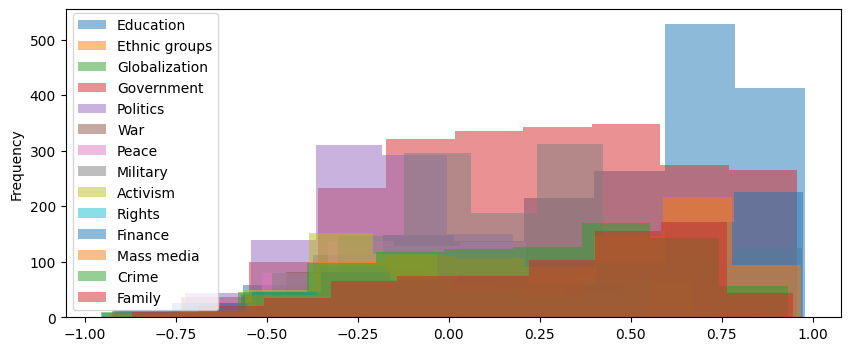

In [31]:
# Plotting histograms

plt.figure(figsize=(10,4))

for cat in alpha3:
    plt.hist([x[1] for x in cat], alpha=0.5,label=cat[0][2])

plt.ylabel('Frequency')
plt.legend()
plt.show()

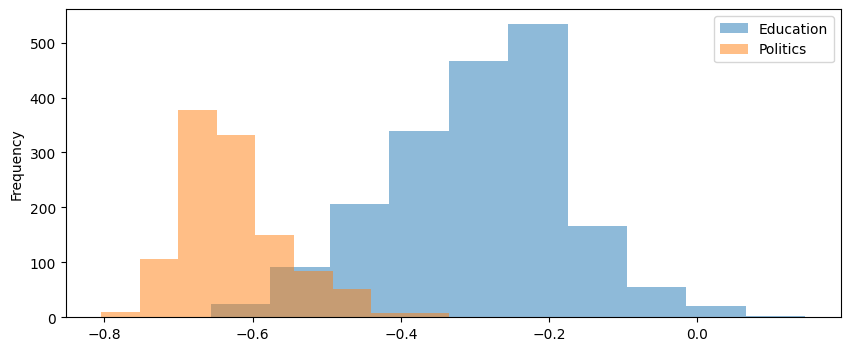

In [32]:
plt.figure(figsize=(10,4))

plt.hist([x[1] for x in alpha0[0]], alpha=0.5,label='Education')
plt.hist([x[1] for x in alpha0[4]], alpha=0.5,label='Politics')

plt.ylabel('Frequency')
plt.legend()
plt.show()

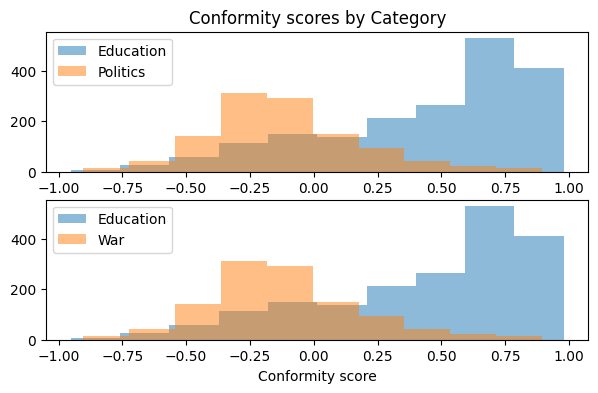

In [33]:
plt.figure(figsize=(7,4))

plt.subplot(2,1,1)
plt.hist([x[1] for x in alpha3[0]], alpha=0.5,label='Education')
plt.hist([x[1] for x in alpha3[4]], alpha=0.5,label='Politics')
plt.legend()
plt.title('Conformity scores by Category')


plt.subplot(2,1,2)
plt.hist([x[1] for x in alpha3[0]], alpha=0.5,label='Education')
plt.hist([x[1] for x in alpha3[4]], alpha=0.5,label='War')
plt.legend()
plt.xlabel('Conformity score')

plt.show()

In [34]:
# Average conformity score by category

conf_by_cat = []

for cat in alpha3:
    values = [x[1] for x in cat]
    mean = sum(values)/len(values)
    conf_by_cat.append((cat[0][2], mean))

In [35]:
conf_by_cat.sort(key=lambda x: x[1], reverse=True)
conf_by_cat

[('Education', 0.4421273082584607),
 ('Finance', 0.3682604383362547),
 ('Mass media', 0.3009228614175884),
 ('Family', 0.286203292791299),
 ('Ethnic groups', 0.2536996482676277),
 ('Government', 0.24595574881750876),
 ('Military', 0.20872636351627735),
 ('Crime', 0.19714816833293453),
 ('Peace', 0.0652348249835051),
 ('Globalization', 0.0405861678482852),
 ('Rights', -0.022229184381708865),
 ('Activism', -0.07870811318013983),
 ('Politics', -0.11684792202873541),
 ('War', -0.2187327941267886)]

# Checking correlations

In [36]:
# Number of triangles
tri = nx.triangles(G)
tri = tri.values()

In [37]:
# Betweenness centrality

"""
bc = nx.betweenness_centrality(G)
bc = list(bc.values())

with open("betweenness_centrality.pkl", 'wb') as f:
     pickle.dump(bc,f)"""

with open("betweenness_centrality.pkl", 'rb') as f:
     bc = pickle.load(f)

In [38]:
# Closeness centrality

"""
clos = nx.closeness_centrality(G)
clos = list(clos.values())

with open("closeness_centrality.pkl", 'wb') as f:
     pickle.dump(clos,f)"""

with open("closeness_centrality.pkl", 'rb') as f:
     clos = pickle.load(f)

In [39]:
# Clustering coefficient
clust = nx.clustering(G)
clust = list(clust.values())

In [40]:
# Degree
deg = list(G.degree)
deg = [x[1] for x in deg]

In [41]:
# Creating dataframe

scores = get_key_value_category(node_to_conformity, 3)

df = pd.DataFrame(scores, columns=['Page','Conformity','Category'])
df['Triangles'] = tri
df['Betweenness'] = bc
df['Closeness'] = clos
df['Clustering'] = clust
df['Degree'] = deg

df.head()

,Page,Conformity,Category,Triangles,Betweenness,Closeness,Clustering,Degree
0,Field trip,0.454362,Education,13,1.789074e-04,0.285073,0.108333,16
1,Education in emergencies and conflict areas,0.043654,Education,31,4.034853e-04,0.322549,0.181287,19
2,Ability grouping,0.803021,Education,6,1.955142e-06,0.258194,0.285714,7
3,Classwide Peer Tutoring,0.801960,Education,1,6.316883e-06,0.257720,0.100000,5
4,Flexible learning,0.727874,Education,4,1.581337e-07,0.238809,0.666667,4


In [42]:
# Plotting correlations
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


/var/folders/kj/2bfwcpp56ljb52n904gv1_700000gn/T/ipykernel_25513/1923349091.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Conformity,Triangles,Betweenness,Closeness,Clustering,Degree
Conformity,1.000000,0.029023,-0.059249,-0.347682,0.233483,-0.027548
Triangles,0.029023,1.000000,0.238384,0.394066,0.191450,0.791794
Betweenness,-0.059249,0.238384,1.000000,0.261326,-0.059773,0.616632
Closeness,-0.347682,0.394066,0.261326,1.000000,0.073896,0.593769
Clustering,0.233483,0.191450,-0.059773,0.073896,1.000000,0.150534
Degree,-0.027548,0.791794,0.616632,0.593769,0.150534,1.000000


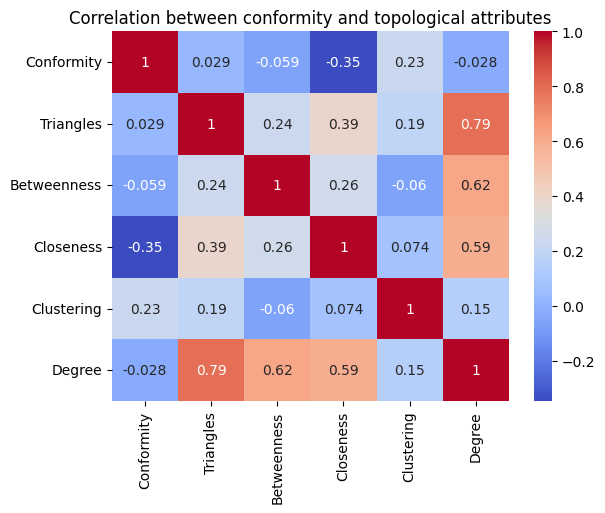

In [43]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

plt.title('Correlation between conformity and topological attributes')
plt.show()

In [45]:
# Nodes with lowest Conformity

df.sort_values(by='Conformity', axis=0).head(20)

,Page,Conformity,Category,Triangles,Betweenness,Closeness,Clustering,Degree
11327,Spyridon Louis,-0.955349,Crime,0,0.000000e+00,0.198859,0.0,1
1792,Ministry of Education and Human Resources Deve...,-0.952483,Education,0,0.000000e+00,0.213731,0.0,1
10749,Retail marketing,-0.933160,Mass media,0,0.000000e+00,0.199303,0.0,1
3986,Provisional Military Dictatorship of Mughan,-0.924461,Government,0,0.000000e+00,0.213134,0.0,1
9387,"Diplomatic Area, Bahrain",-0.919385,Finance,0,0.000000e+00,0.218728,0.0,1
10072,National Payroll Week,-0.915775,Finance,9,3.149416e-10,0.227473,0.9,5
4190,Project Weber/RENEW,-0.914039,Government,0,0.000000e+00,0.227461,0.0,1
8442,Rightful resistance,-0.912116,Activism,0,0.000000e+00,0.236009,0.0,1
11333,Cynthia Payne,-0.911307,Crime,0,0.000000e+00,0.240062,0.0,1
9877,Aladdin (BlackRock),-0.910807,Finance,0,0.000000e+00,0.228132,0.0,1


In [46]:
# Nodes with lowest Conformity

df.sort_values(by='Conformity', axis=0, ascending=False).head(20)

,Page,Conformity,Category,Triangles,Betweenness,Closeness,Clustering,Degree
1844,Recall of facts,0.980053,Education,0,0.000000e+00,0.150848,0.0,1
431,May L. Cheney,0.973446,Education,0,0.000000e+00,0.164928,0.0,1
10155,Swap spread,0.973266,Finance,0,0.000000e+00,0.150658,0.0,1
7617,Ossetian Military Road,0.971204,Military,0,0.000000e+00,0.152459,0.0,1
10085,On the run (finance),0.969455,Finance,0,0.000000e+00,0.156598,0.0,1
10120,Rollover (foreign exchange),0.969455,Finance,0,0.000000e+00,0.156598,0.0,1
10267,Strange as It Seems,0.968620,Mass media,0,0.000000e+00,0.157043,0.0,1
9647,Basic Earnings Per Share,0.967929,Finance,1,0.000000e+00,0.162028,1.0,2
740,Everyday Mathematics,0.965859,Education,0,1.567275e-04,0.177643,0.0,2
10063,Mid price,0.961987,Finance,0,0.000000e+00,0.161260,0.0,1


In [48]:
df[df['Page']=='World War II']

,Page,Conformity,Category,Triangles,Betweenness,Closeness,Clustering,Degree
7030,World War II,-0.25553,Military,6406,0.117558,0.420794,0.013916,960


In [49]:
df[df['Page']=='World War I']

,Page,Conformity,Category,Triangles,Betweenness,Closeness,Clustering,Degree
7029,World War I,-0.180922,Military,3578,0.040144,0.390304,0.020592,590


In [50]:
df[df['Page']=='World war']

,Page,Conformity,Category,Triangles,Betweenness,Closeness,Clustering,Degree
7028,World war,-0.034445,Military,16539,0.003136,0.366706,0.397419,289


In [51]:
df[df['Page']=='Military']

,Page,Conformity,Category,Triangles,Betweenness,Closeness,Clustering,Degree
3376,Military,-0.528982,Government,15792,0.073898,0.390161,0.043459,853
